#  <ins>Regression Task</ins>
## Working with data

In [1]:
# Importing important libraries
import time
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
# Loading ML_case_Study file using pandas library
df = pd.read_csv(r"C:\Users\aksha\Downloads\Python Exercise\ML_case_Study.csv")

# Loading Colleges file
college = pd.read_csv(r"C:\Users\aksha\Downloads\Python Exercise\Colleges.csv")

#Loading cities file
city = pd.read_csv(r"C:\Users\aksha\Downloads\Python Exercise\cities.csv")

## Displaying top 5 rows from each file

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# --------------------------------------------------------------------------------------------------------------

In [6]:
# Convert college dataframe into 3 lists
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [7]:
# Replace first loaded dataframe i.e. df , college column with 1, 2 and 3 on Tier1, Tier2, Tier3 respectively
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)

In [8]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [9]:
# Convert Cities dataframe into 2 lists
metro_city = city["Metrio City"].tolist()
non_metro_city = city["non-metro cities"].tolist()

In [10]:
# Replace first loaded dataframe i.e.df , city column with list category i.e.Metro_city ,non_metro_city
for item in df.City:
    if item in metro_city:
        df["City"].replace(item,1,inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item,0,inplace=True)

In [11]:
# show first five rows of dataframe for checkig purpose
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


# ---------------------------------------------------------------------------------------------------------------- 

# Data Preprocessing 

## Finding missing values 

In [12]:
# Analyzing the dataframe to see if there are any missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


#### Observation : - 
No missing values found

## Creating Dummy variables

In [13]:
df = pd.get_dummies(df, columns = ['Role'], drop_first = True)

In [14]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


## Finding Outliers

In [15]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


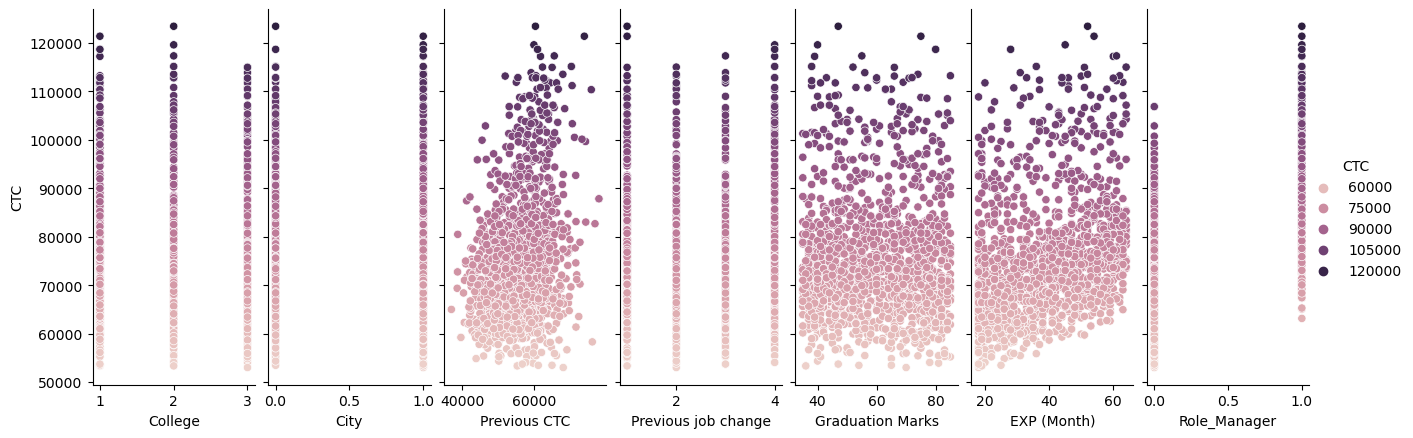

In [16]:
fig_pair = sns.pairplot(df, x_vars = ["College", "City", "Previous CTC", "Previous job change", "Graduation Marks", "EXP (Month)", "Role_Manager"], y_vars = ["CTC"], hue="CTC")
fig_pair.fig.set_size_inches(14,5)

### Observation : -
#### No outliers can be seen from the Extended Data Dictionary (EDD) of df and the pairplot between CTC and other independent variables
# ----------------------------------------------------------------------------------------------------------------

# Splitting Data into X and y

In [17]:
X = df.loc[:, df.columns != "CTC"]
y = df["CTC"]

In [18]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [19]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

# ---------------------------------------------------------------------------------------------------------------- 

# Train-Test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# ----------------------------------------------------------------------------------------------------------------

# Feature Selection by -  Lasso

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve

In [22]:
scaler = StandardScaler()

In [23]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [24]:
# Creating a range for alpha values to fit the model
param_range = np.logspace(-2, 8, 100)

In [25]:
# Using validation curve to find out the values of r2 for different alpha
train_scores, test_scores = validation_curve(Lasso(), X_train_s, y_train, param_name = 'alpha', param_range = param_range, scoring = "r2")

In [26]:
train_mean = np.mean(train_scores, axis=1)

In [27]:
test_mean = np.mean(test_scores, axis=1)

Text(0, 0.5, 'r2')

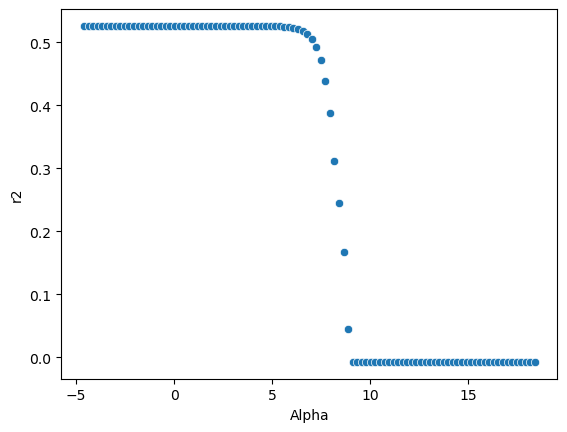

In [28]:
# Plotting graph for r2 v/s alpha
fig1 = sns.scatterplot(x = np.log(param_range), y = test_mean)
fig1.set_xlabel("Alpha")
fig1.set_ylabel("r2")

In [29]:
# Finding the best value of r2
best_r2 = np.where(test_mean == max(test_mean))

In [30]:
# Finding the best value for alpha by corresponding value of best r2
best_alpha = param_range[best_r2][0]

In [31]:
best_alpha

43.28761281083057

In [32]:
# Creating our model by best alpha value
lm_l = Lasso(alpha = best_alpha)

In [33]:
lm_l.fit(X_train_s, y_train)

Lasso(alpha=43.28761281083057)

In [34]:
# Finding out the variables with Coefficient(beta) != 0 i.e. variables which impact our model
impactful_var = X_test.columns[lm_l.coef_ != 0]

# Finding out the variables with Coefficient(beta) = 0 i.e. variables which do not impact our model
useless_var = X_test.columns[lm_l.coef_ == 0]

In [35]:
print(f"Selected variables: {impactful_var} \nVariables to discard: {useless_var}")

Selected variables: Index(['College', 'City', 'Previous CTC', 'Previous job change',
       'Graduation Marks', 'EXP (Month)', 'Role_Manager'],
      dtype='object') 
Variables to discard: Index([], dtype='object')


#### Observation : - 
We can see that all variables have some impact on our dependent variable or model hence we are going to select all variables for
evaluating our model.
# ----------------------------------------------------------------------------------------------------------------

## Why should we use R2 score for our evaluation - 
The R-squared (R2) score is commonly used as a metric for assessing the predictive accuracy of regression models. 
Here's why R2 score is often used and when it's suitable:

1. **Interpretability:** R2 is a straightforward and interpretable metric. It represents the proportion of the variance in the dependent variable (the target) that is predictable from the independent variables (the features). An R2 score of 1.0 indicates a perfect fit, while a score of 0.0 indicates that the model does no better than predicting the mean of the target variable.

2. **Comparability:** R2 allows for easy comparison between different models. When you have multiple regression models or variations of a model, you can use R2 to compare their goodness of fit. Higher R2 values generally indicate better model performance.

3. **Baseline Comparison:** R2 provides a baseline to compare your model's performance to a simple baseline model. If your model's R2 is significantly better than the baseline (e.g., predicting the mean of the target), it indicates that your model adds value.

4. **Usefulness in Model Selection:** In a model selection context, R2 can be helpful for choosing the best model among several alternatives.

In summary, while R2 is a valuable metric for assessing the goodness of fit in regression models and is widely used for its simplicity and interpretability, it should be used in conjunction with other metrics and domain-specific considerations to comprehensively evaluate the performance of a predictive model, especially in cases where it may not be the best-suited metric.
# ----------------------------------------------------------------------------------------------------------------

# Model Selection 

## 1) Linear Regression 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:
start_time_lm = time.time()

In [38]:
#Creating our linear regression model
lm = LinearRegression()

In [39]:
#Fitting our model
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
print(lm.coef_, lm.intercept_)

[-3.96799551e+02  9.32400785e+02  4.28858057e-01  9.82300083e+01
  9.94507467e+00  2.57591989e+02  1.92412378e+04] 36989.4282547925


#### R2 score is the best evaluation metric to predict the accuracy of any Linear Regression model therefore we can use it here to get our model's accuracy.

In [41]:
print(f"Test R2 score = {r2_score(y_test, lm.predict(X_test))}")
print(f"Train R2 score = {r2_score(y_train, lm.predict(X_train))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, lm.predict(X_test))}")

end_time_lm = time.time()

Test R2 score = 0.5355989894790042
Train R2 score = 0.5331293335456955
Mean Squared Error: 68909870.69952634


In [42]:
print(f"Time taken by Linear Regression Algorithm: {end_time_lm - start_time_lm} seconds")

Time taken by Linear Regression Algorithm: 0.1074521541595459 seconds


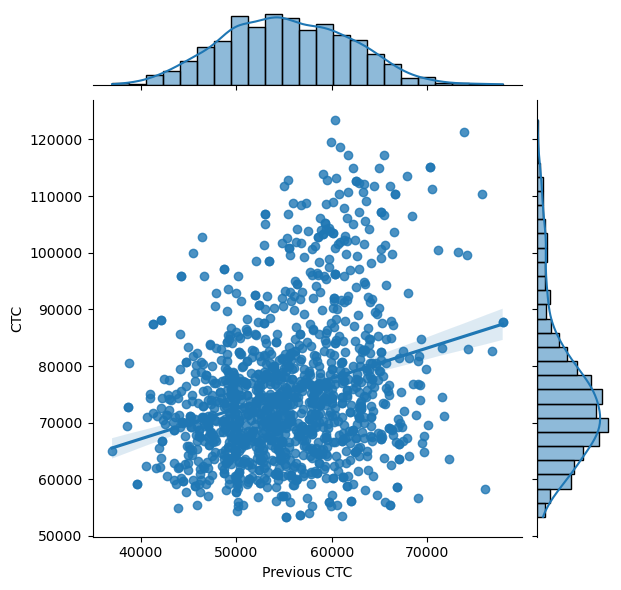

In [43]:
sns.jointplot(df, x=X_train['Previous CTC'], y=y_train, kind="reg")

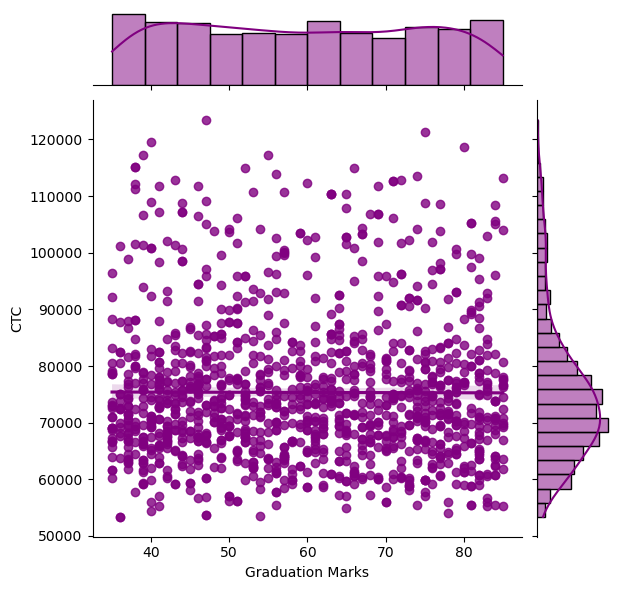

In [44]:
sns.jointplot(df, x = X_train['Graduation Marks'], y = y_train, kind= "reg", color = "purple")

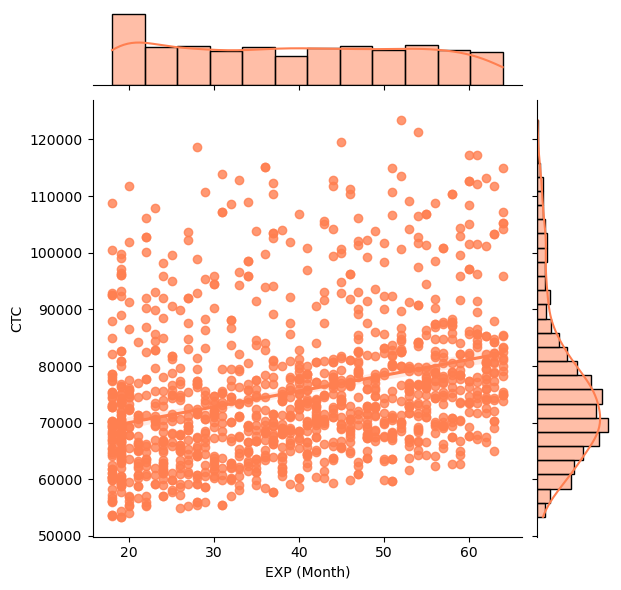

In [45]:
sns.jointplot(df, x = X_train['EXP (Month)'], y = y_train, kind = "reg", color = "coral")

### Model Evaluation 
#### Linear Regression model is not a very efficient model for predicting the outcome due to: -
1. R2 Score is 0.5359.. i.e. only about 53.56% values are correctly predicted by the model.
2. Line of best fit for different predictor variables v/s CTC has high variance with the actual data.
# ----------------------------------------------------------------------------------------------------------------

## 2)  Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

In [47]:
start_time_ridge = time.time()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
# Feature scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [50]:
# Creating a range for alpha values
param_range = np.logspace(-2, 8, 100)

In [51]:
# Validation curve gives 3 values of r2 for every alpha
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, param_name = "alpha", param_range = param_range, scoring = "r2")

In [52]:
# Column-wise mean of r2 to find corresponding r2 value for each alpha
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

Text(0, 0.5, 'r2')

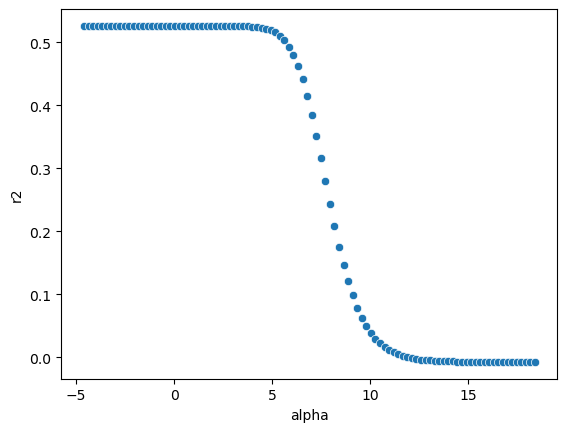

In [53]:
fig2 = sns.scatterplot(x = np.log(param_range), y=test_mean)
fig2.set_xlabel("alpha")
fig2.set_ylabel("r2")

In [54]:
# Finding the max r2 values as the best r2
best_r2 = np.where(test_mean == max(test_mean))

In [55]:
# Finding the best alpha value corresponding to best r2
best_param = param_range[best_r2][0]

In [56]:
best_param

4.229242874389499

In [57]:
# Creating the Ridge model
lm_ridge = Ridge(alpha = best_param)

In [58]:
# Fitting our ridge model
lm_ridge.fit(X_train_s, y_train)

Ridge(alpha=4.229242874389499)

In [59]:
print(f"Test R2 value = {r2_score(y_test, lm_ridge.predict(X_test_s))}")
print(f"Train R2 value = {r2_score(y_train, lm_ridge.predict(X_train_s))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, lm_ridge.predict(X_test_s))}")

end_time_ridge = time.time()

Test R2 value = 0.5351624824560337
Train R2 value = 0.5331238227310131
Mean Squared Error: 68974641.5372956


In [60]:
print(f"Time taken by Ridge Regression Algorithm: {end_time_ridge - start_time_ridge} seconds")

Time taken by Ridge Regression Algorithm: 1.3826916217803955 seconds


###  Model Evaluation
#### Ridge regression has an r2 (test) value of 0.5351.. i.e. it's prediction accuracy is about 53.51% which is moderately fine but not as accurate as we would be needing. 
# ----------------------------------------------------------------------------------------------------------------

## 3) Lasso Regression

In [61]:
from sklearn.linear_model import Lasso

In [62]:
start_time_lasso = time.time()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [64]:
# Feature scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [65]:
param_range = np.logspace(-2, 8, 100)

In [66]:
train_scores, test_scores = validation_curve(Lasso(), X_train_s, y_train, param_name = "alpha", param_range = param_range, scoring = "r2")

In [67]:
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

Text(0, 0.5, 'r2')

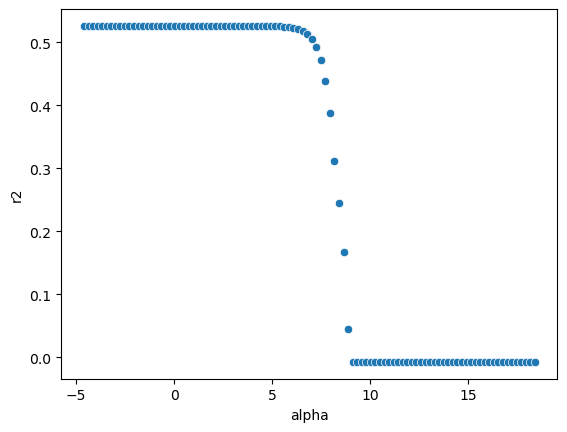

In [68]:
fig2 = sns.scatterplot(x = np.log(param_range), y=test_mean)
fig2.set_xlabel("alpha")
fig2.set_ylabel("r2")

In [69]:
best_r2 = np.where(test_mean == max(test_mean))

In [70]:
best_param = param_range[best_r2][0]

In [71]:
best_param

43.28761281083057

In [72]:
lm_lasso = Lasso(alpha = best_param)

In [73]:
lm_lasso.fit(X_train_s, y_train)

Lasso(alpha=43.28761281083057)

In [74]:
print(f"Test R2 value = {r2_score(y_test, lm_lasso.predict(X_test_s))}")
print(f"Train R2 value = {r2_score(y_train, lm_lasso.predict(X_train_s))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, lm_lasso.predict(X_test_s))}")

end_time_lasso = time.time()

Test R2 value = 0.5358419997804814
Train R2 value = 0.5330506384208464
Mean Squared Error: 68873811.75892527


In [75]:
print(f"Time taken by Lasso Regression Algorithm: {end_time_lasso - start_time_lasso} seconds")

Time taken by Lasso Regression Algorithm: 1.3771693706512451 seconds


### Model Evaluation
#### Lasso has an r2 (test) value of 0.5358.. i.e. it has a prediction accuracy of about 53.6% which is higher than our Ridge model and Linear model.
Lasso seems to be performing better than other models but there may still be room for improvement and it's essential to find the best model for our data prediction with least error-rate and best prediction accuracy
# ----------------------------------------------------------------------------------------------------------------

## 4) KNN - Regression

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [77]:
start_time_knn = time.time()

In [78]:
# Training our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [79]:
# Feature scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [80]:
# Creating a basic KNN model 
knn_model = KNeighborsRegressor()

In [81]:
# Takes value from 1 to 7 for nearest neighbors in KNN tranform (for further use).
param_grid_knn = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10],
}

In [82]:
# Uses GridSearchCV library to fit every n_neighbors value from 'param_grid_knn' dictionary.
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv = 5, n_jobs = -1, scoring = "r2")

In [83]:
# fitting our model
grid_search_knn.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='r2')

In [84]:
# Best n_neighbors value
grid_search_knn.best_params_

{'n_neighbors': 10}

In [85]:
# Fitting the best n_neighbors value to create the best KNN model
cvknn = grid_search_knn.best_estimator_

In [86]:
print(f"Test R2 score = {r2_score(y_test, cvknn.predict(X_test_s))}")
print(f"Train R2 score = {r2_score(y_train, cvknn.predict(X_train_s))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, cvknn.predict(X_test_s))}")

end_time_knn = time.time()

Test R2 score = 0.5604949633057222
Train R2 score = 0.6396786962796712
Mean Squared Error: 65215696.27166864


In [87]:
print(f"Time taken by KNN Algorithm: {end_time_knn - start_time_knn} seconds")

Time taken by KNN Algorithm: 12.721222400665283 seconds


### Model Evaluation
#### KNN model has an r2 (test) value of 0.5604.. i.e. about 56% which is pretty good and higher than other models used till now.
Although KNN seems to be performing well we should still try to improve our model to get the best fitted model for our data.
# ----------------------------------------------------------------------------------------------------------------

## 5) Random Forest (Ensemble Method)

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [89]:
start_time_rf = time.time()

In [90]:
# Training our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
# Feature scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [92]:
# Creating a basic Random Forest Model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)

In [93]:
''' Creating a parameter dictionary which contains estimators for RandomForestRegressor that help in 
pruning the data (for further use). '''

param_grid_rf = {
    'max_features': [2, 3, 4, 5],
    'max_depth': [3, 4, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
}

In [94]:
# Fitting every param_grid_rf value to our Random Forest model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, n_jobs = -1, cv = 5, scoring = "r2")

In [95]:
# Fitting our model
grid_search_rf.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 7, 10],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [96]:
# Value of parameters for best accuracy
grid_search_rf.best_params_

{'max_depth': 10, 'max_features': 3, 'min_samples_split': 2}

In [97]:
# Fitting our model with best parameter values
cvrf = grid_search_rf.best_estimator_

In [98]:
print(f"Test R2 score = {r2_score(y_test, cvrf.predict(X_test_s))}")
print(f"Train R2 score = {r2_score(y_train, cvrf.predict(X_train_s))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, cvrf.predict(X_test_s))}")

Test R2 score = 0.6003547643017487
Train R2 score = 0.8807589828338201
Mean Squared Error: 59301123.15378596


In [99]:
end_time_rf = time.time()

In [100]:
print(f"Time taken by Random Forest Algorithm: {end_time_rf - start_time_rf} seconds")

Time taken by Random Forest Algorithm: 175.49839782714844 seconds


### Model Evaluation: -
#### Random Forest model seems to be highly acccurate as compared to the other models with an r2 (test) and r2 (train) score of 0.6003.. and 0.8807 respectively i.e. it has an accuracy of > 60% with the test data. 
#### Downside:
- The main problem that arises with Random forest is the time taken by it, as it takes a huge amount of time to fit the data with different values for hyperparameters.
It seems Random Forest is performing very effectively in Analyzing our model, irrespective of the time taken by it. Still, we should try to improve upon our model till we get the best-fitted model for our data.
# ----------------------------------------------------------------------------------------------------------------

## 6) Gradient Boosting 

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [102]:
start_time_gb = time.time()

In [103]:
# Training our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [104]:
# Feature scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [105]:
# Creating a basic Gradient boost model
gb = GradientBoostingRegressor()

In [106]:
# Creating a parameter grid dictionary to help in predicting the best hyperparameters for Gradient Boosting.
param_grid_gb = {
    "n_estimators": [250, 500, 1000],
    "learning_rate": np.linspace(0.01, 0.1, 5),
    "max_depth": [1, 2, 3]
}

In [107]:
# Finding the optimal parameter values from the parameter grid
grid_search_gb = GridSearchCV(gb, param_grid_gb, n_jobs = -1, cv = 5, scoring = "r2")

In [108]:
# Fitting our model
grid_search_gb.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                         'max_depth': [1, 2, 3],
                         'n_estimators': [250, 500, 1000]},
             scoring='r2')

In [109]:
# Finding the best Hyperparameters
grid_search_gb.best_params_

{'learning_rate': 0.05500000000000001, 'max_depth': 2, 'n_estimators': 500}

In [110]:
# Creating a model with best hyperparameters
cvgb = grid_search_gb.best_estimator_

In [111]:
print(f"Test R2 score = {r2_score(y_test, cvgb.predict(X_test_s))}")
print(f"Train R2 score = {r2_score(y_train, cvgb.predict(X_train_s))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, cvgb.predict(X_test_s))}")

end_time_gb = time.time()

Test R2 score = 0.5712302125254594
Train R2 score = 0.7267312168099574
Mean Squared Error: 63622752.632658556


In [112]:
print(f"Time taken by Gradient Boosting Algorithm: {end_time_gb - start_time_gb} seconds")

Time taken by Gradient Boosting Algorithm: 35.60228180885315 seconds


### Model Evaluation: -
#### Gradient Boosting seems to be a decent model for our data prediction with an r2 (test) score of 0.5710.. or 57.1% prediction accuracy with the test data and an r2 (train) score of 0.726 or about 72.6% prediction accuracy with the train data.
#### Even though it is not as accurate as the Random Forest algorithm, it takes less than half of the time taken by Random forest.
# ----------------------------------------------------------------------------------------------------------------


## 7) Ada Boost

In [113]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [114]:
start_time_ada = time.time()

In [115]:
# Training our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [116]:
# Feature scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [117]:
# Creating a basic model for Ada Boost
ada = AdaBoostRegressor()

In [118]:
# Creating a hyperparameter grid 
param_grid_ada = {
    "n_estimators": [250, 500, 1000],
    "learning_rate": np.linspace(0.01, 0.1, 5),
}

In [119]:
# Finding the optimal parameter values from the parameter grid
grid_search_ada = GridSearchCV(ada, param_grid_ada, n_jobs = -1, cv = 5, scoring = "r2")

In [120]:
# Fitting our model
grid_search_ada.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                         'n_estimators': [250, 500, 1000]},
             scoring='r2')

In [121]:
# Finding the best hyperparameter values
grid_search_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 250}

In [122]:
# Creating a model with best best hyperparameter values
cvada = grid_search_ada.best_estimator_

In [123]:
print(f"Test R2 score = {r2_score(y_test, cvada.predict(X_test_s))}")
print(f"Train R2 score = {r2_score(y_train, cvada.predict(X_train_s))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, cvada.predict(X_test_s))}")

end_time_ada = time.time()

Test R2 score = 0.5891423427627436
Train R2 score = 0.625624262791376
Mean Squared Error: 60964871.72662955


In [124]:
print(f"Time taken by Ada Boost Algorithm: {end_time_ada - start_time_ada} seconds")

Time taken by Ada Boost Algorithm: 13.693078994750977 seconds


### Model Evaluation: -
#### Ada Boost seems to be a pretty decent algorithm for our data with r2 (test) and r2 (train) scores as 0.5895.. or about 59% prediction accuracy and 0.6257.. or about 62.6% prediction accuracy respectively.
#### It requires a lot less time than Random Forest and Gradient Boosting and provides a better result than Linear Regression, Ridge Regression, Lasso and KNN models
# ----------------------------------------------------------------------------------------------------------------

## 8) XG Boost 

In [125]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [126]:
start_time_xgb = time.time()

In [127]:
# Training our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [128]:
# Feature scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [129]:
# Creating an XGB model with some default set hyperparameters
xgb_reg = XGBRegressor(n_estimators = 10000, learning_rate = 0.01, max_depth = 5, random_state = 0)

In [130]:
# Fitting our model
xgb_reg.fit(X_train_s, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [131]:
print(f"Test R2 score: {r2_score(y_test, xgb_reg.predict(X_test_s))}")
print(f"Train R2 score: {r2_score(y_train, xgb_reg.predict(X_train_s))}")
print(f"Mean Squared Error: {mean_squared_error(y_test, xgb_reg.predict(X_test_s))}")

end_time_xgb = time.time()

Test R2 score: 0.46584314616765843
Train R2 score: 0.9978578946407111
Mean Squared Error: 79260550.46598203


In [132]:
print(f"Time taken by XG Boost Algorithm: {end_time_xgb - start_time_xgb} seconds")

Time taken by XG Boost Algorithm: 17.141143083572388 seconds


### Model Evaluation: -
#### The XGB model seems to be very accurate on the training data with an r2 (train) score of 0.9978.. or about 99.8% accuracy but the model lacks the accuracy with testing data as the r2 (test) score has a value of 0.4658.. or about only 46.6% which is pretty low compared to any other model used previously.
#### Therefore due to such a low r2 (test) score we will not consider XG Boost for our evaluation.
# ----------------------------------------------------------------------------------------------------------------

# Comparing accuracy of our model

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

### By R2 score

In [134]:
# Giving r2 score for every model
model_score = {
    "Linear_Regression": 0.5356,
    "Ridge": 0.5351,
    "Lasso": 0.5358,
    "KNN": 0.5604,
    "Random Forest": 0.6003,
    "Gradient Boosting": 0.5710,
    "Ada Boost": 0.5895,
    "XG Boost": 0.4658
}
models = list(model_score.keys())
r2_values = list(model_score.values())

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Linear_Regression'),
  Text(1, 0, 'Ridge'),
  Text(2, 0, 'Lasso'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'Gradient Boosting'),
  Text(6, 0, 'Ada Boost'),
  Text(7, 0, 'XG Boost')])

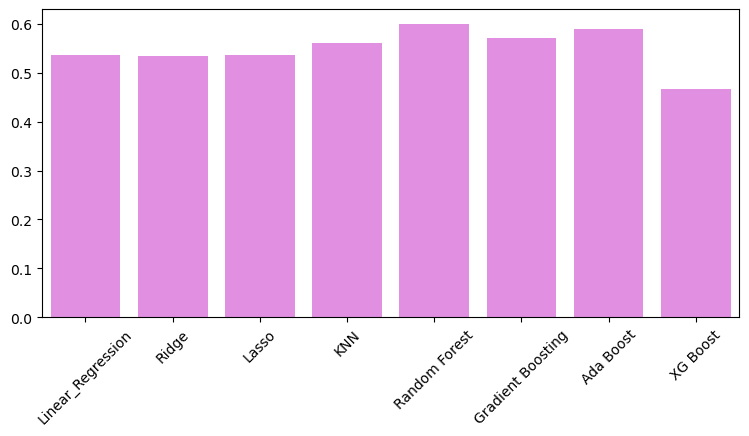

In [135]:
# Plotting a bar-chart for displaying r2 scores of every model
plt.figure(figsize = (9, 4))                             # Giving figure it's length and width
sns.barplot(x = models, y = r2_values, color = "violet") # Plotting barplot 
plt.xticks(rotation = 45)                                # Rotating x-labels by 45 deg so that they dont cluster into each other

### By MSE values 

In [136]:
# Giving error-rate for every model
model_error_rate = {
    "Linear_Regression": 68909870.6995,
    "Ridge": 68974641.5372,
    "Lasso": 68873811.7589,
    "KNN": 65215696.2716,
    "Random Forest": 59301123.1537,
    "Gradient Boosting": 63650714.7949,
    "Ada Boost": 61041292.2010,
    "XG Boost":79260550.4659
}

mse_values = list(model_error_rate.values())

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Linear_Regression'),
  Text(1, 0, 'Ridge'),
  Text(2, 0, 'Lasso'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'Gradient Boosting'),
  Text(6, 0, 'Ada Boost'),
  Text(7, 0, 'XG Boost')])

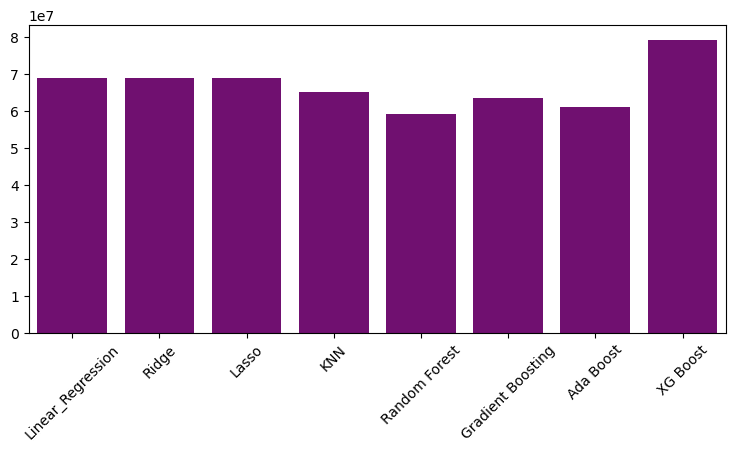

In [137]:
# Plotting a bar-chart for displaying mse values of every model
plt.figure(figsize = (9, 4))                             # Giving figure it's length and width
sns.barplot(x = models, y = mse_values, color = "purple") # Plotting barplot 
plt.xticks(rotation = 45)                                # Rotating x-labels by 45 deg so that they dont cluster into each other

### Observation: -
#### Therefore we can observe that the **Random forest Algorithm** of all the models used has the highest value of R2 score and the least value of MSE which means it will be our best choice for model selection for our data prediction.
# ----------------------------------------------------------------------------------------------------------------

# Model Prediction with our data

In [138]:
# Creating a dataframe for predicting the CTC values for our data
sample_data = pd.DataFrame({
    'College': [1, 2, 3],
    'City': [1, 1, 1],
    'Previous CTC': [72000, 25000, 10000],
    'Previous job change': [6, 4, 2],
    'Graduation Marks': [80, 65,62],
    'EXP (Month)': [18, 12, 6],
    'Role_Manager': [1, 0, 0]
})
sample_data

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,1,1,72000,6,80,18,1
1,2,1,25000,4,65,12,0
2,3,1,10000,2,62,6,0


In [139]:
# Scaling our data
scaler = StandardScaler()
sample_data_s = scaler.fit_transform(sample_data)
sample_data_s

array([[-1.22474487,  0.        ,  1.37567499,  1.22474487,  1.3970014 ,
         1.22474487,  1.41421356],
       [ 0.        ,  0.        , -0.40386789,  0.        , -0.50800051,
         0.        , -0.70710678],
       [ 1.22474487,  0.        , -0.9718071 , -1.22474487, -0.88900089,
        -1.22474487, -0.70710678]])

### For our data we have found that Random Forest is the best Algorithm for prediction -

In [140]:
# Use the Random Forest trained Model to Make Predictions
predicted_ctc = cvrf.predict(sample_data_s)

In [141]:
# Print the predicted CTC for the newly hired employees
print("Predicted CTCs:\n", predicted_ctc)

Predicted CTCs:
 [107468.02793525  70253.74044695  66031.22687356]


# ----------------------------------------------------------------------------------------------------------------
# <ins>Task</ins>

### 1) Your views about the problem statement?

The problem statement provided outlines a common and practical scenario in the field of data science and machine learning. It describes the task of predicting employee salaries (CTC) based on various features and provides context about the company, TechWorks Consulting, and its need to determine fair and competitive compensation for its employees. Here are my views on the statement:

1. **Relevance and Real-World Application:** The problem statement is highly relevant and reflects a real-world challenge faced by many companies. Accurate salary prediction is crucial for attracting and retaining top talent, making it a practical and important task.

2. **Data Availability:** The statement mentions the availability of employee data, including features like college, city, role, previous CTC, experience, and more. Having access to such data is essential for building a predictive model.

3. **Data Preprocessing Challenges:** The statement highlights specific data preprocessing tasks, such as handling categorical variables, converting them into numerical format, and addressing missing values and outliers. These preprocessing steps are critical for model accuracy.

4. **Regression Task:** The statement correctly identifies this as a regression task since the goal is to predict a continuous variable (employee salary).

5. **Machine Learning Approach:** The statement suggests using a machine learning approach for salary prediction, which is appropriate. Machine learning models can capture complex relationships between features and salaries.

6. **Model Evaluation:** It emphasizes the importance of model evaluation, mentioning metrics like Mean Squared Error (MSE) and R-squared. Proper model evaluation is crucial for assessing model accuracy.

7. **Continuous Improvement:** The statement encourages continuous improvement by suggesting steps to enhance the model's performance, such as feature engineering, hyperparameter tuning, and considering ensemble methods. This reflects a commitment to refining the model.

Overall, the problem statement is well-framed, addressing a practical business need with the potential for meaningful impact. It outlines a comprehensive approach, from data preprocessing to model selection and improvement, reflecting a thoughtful and systematic approach to solving the problem. The inclusion of evaluation metrics and suggestions for improvement demonstrates a commitment to achieving accurate salary predictions.
## -----------------------------------------------------------------------------------------------------------------------------------

### 2) What will be your approach to solving this task?


**My Approach for Solving the Task:**

1. **Data Exploration and Understanding:**
   - Begin by loading and exploring the provided employee datasets i.e. ML_case_Study, Colleges and cities to gain a clear understanding of its structure and contents.
   - Merge the College and city data into the ML_case_Study data by converting them into numerical lists and then merging them using pandas dataframe
   - Identify the target variable, which is the "CTC", and inspect the distribution of salaries.

2. **Data Preprocessing:**
   - Handle missing values: Identify and address any missing values in the dataset. We can use techniques like imputation based on the extent of missingness.
   - Outlier detection and treatment: Identify and handle outliers in the data. Outliers can significantly impact model performance, so consider techniques like trimming or transformation.
   - Feature scaling: Scale numerical features to ensure that they are on a similar scale. 
   - Creating dummy variables: Create dummy variables for required fields like Role.

3. **Data Splitting:**
   - Split the dataset into training and testing subsets. A typical split might be 80% for training and 20% for testing.

4. **Model Selection:**
   - Choose a regression model(s) for predicting salaries. Common options include Linear Regression, Ridge Regression, Lasso Regression, KNN, Random Forest Regression, Gradient Boosting (e.g., XGBoost), or other regression algorithms.
   - Train multiple models with different algorithms and evaluate their performance.

5. **Model Evaluation:**
   - Evaluate the models using appropriate regression metrics. Key metrics to consider include Mean Squared Error (MSE), R-squared (R2) and others.
   - Visualize the model's performance using plots such as scatter plots of predicted vs. actual salaries.

6. **Hyperparameter Tuning:**
   - If we choose models that have hyperparameters (e.g., tree depth, learning rate), perform hyperparameter tuning to optimize model performance. You can use techniques like grid search or random search.

7. **Feature Importance Analysis:**
   - Analyze feature importance to understand which features have the most significant impact on salary predictions. This analysis can guide feature selection and model interpretation.

8. **Model Selection and Deployment:**
   - Select the best-performing model based on evaluation metrics and project goals.
   - Deploy the selected model for making predictions on new data.

This approach outlines a systematic workflow for addressing the task, from data preprocessing to model selection and evaluation. It emphasizes data quality, model performance, and continuous improvement to achieve accurate and reliable salary predictions for TechWorks Consulting.
## -----------------------------------------------------------------------------------------------------------------------------------


### 3) What were the available ML model options you had to perform this task?

There are several machine learning models that we can consider for performing the task of predicting employee salaries. The choice of the model depends on the nature of the data and the accuracy of the model. Here are some commonly used regression models for this task:

1. **Linear Regression:** Linear regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable (salary). It's a good starting point for regression tasks.


2. **Ridge and Lasso Regression:** Ridge and Lasso are methods for machine learning which use regularization with the help of a tuning parameter lambda. They help prevent overfitting and can improve model generalization.


3. **K-Nearest Neighbors Regression (KNN Regression):** KNN Regression makes predictions based on the average of the k-nearest neighbors in the feature space. Hyperparameter tuning can be used to get the best value of k_neighbors for best prediction accuracy.
   

4. **Random Forest Regression:** Random Forest Regression is an ensemble learning method that combines multiple decision trees to make predictions. It is robust and often performs well, even when the data has complex relationships.


5. **Gradient Boosting Regression (e.g., XGBoost):** Gradient boosting algorithms like XGBoost are powerful and widely used for regression tasks. They can capture complex patterns in the data and handle both numerical and categorical features.


6. **Ada Boost:** AdaBoost can be a valid choice for regression tasks, including predicting employee salaries. It is particularly useful when you want to combine the predictive power of multiple weak models while avoiding overfitting.


7. **Neural Networks (Deep Learning):** Deep learning models, such as feedforward neural networks, can be used for regression tasks. They are capable of capturing intricate patterns in the data but may require larger datasets and more computational resources.


8. **Decision Tree Regression:** Decision tree regression models are simple to understand and visualize. They partition the feature space into regions and make predictions based on the average target value within each region.


9. **Gaussian Process Regression:** Gaussian process regression is a non-parametric Bayesian approach that can capture complex relationships between features and target variables. It's particularly useful when the data is sparse or noisy.

## -----------------------------------------------------------------------------------------------------------------------------------

### 4) Which model’s performance is best and what could be the possible reason for that?

Determining the best-performing model for predicting employee salaries or any other regression task depends on several factors, including the dataset, the evaluation metrics used, and the specific goals of the project. Typically, we should evaluate multiple models and select the one that performs the best according to our chosen evaluation metrics like Mean Squared Error (MSE), R-squared (R2), Mean Absolute Error (MAE), and others.

**For our data Random Forest Regressor seems to be the best predictor model due to: -**
- Highest R2 score among all models/algorithms.
- Least MSE value among all models/algorithms.

**We get these highly accurate results due to: -**

1. **Ensemble Learning:** Random Forest is an ensemble learning technique that combines multiple decision trees to make predictions. This ensemble approach tends to reduce overfitting and improve model generalization, resulting in more accurate predictions.

2. **Feature Randomization:** Random Forest introduces randomness in two ways:
   - Randomly selecting a subset of features for each tree (feature bagging): This reduces the correlation between trees and ensures that all relevant features have a chance to influence the predictions.
   - Randomly sampling the training data with replacement (bootstrapping): This introduces diversity among the training sets used to build individual trees.

3. **Bootstrap Aggregating (Bagging):** The use of bootstrapping in Random Forest helps to reduce the variance of the model by averaging the predictions from multiple trees. This ensemble technique often leads to more stable and accurate predictions.

4. **Reduced Risk of Overfitting:** Random Forests tend to be less prone to overfitting compared to single decision trees. The combination of multiple trees and feature randomization helps to prevent the model from memorizing noise in the data.

5. **Handling Non-Linearity:** Random Forest can capture complex non-linear relationships in the data. By combining multiple decision trees, it can approximate functions that are not easily modeled by linear methods.

6. **Robust to Outliers:** Random Forest is robust to the presence of outliers because individual decision trees may be less affected by extreme values. The ensemble nature of Random Forest further mitigates the impact of outliers.

7. **Implicit Feature Selection:** Random Forest can implicitly rank the importance of features based on their contribution to the model's performance. This can help identify which features are most informative for making accurate predictions.

8. **Robust to Irrelevant Features:** Random Forest can handle datasets with many irrelevant or redundant features. The feature selection process in each tree helps filter out less informative features.

9. **Parallelism:** Random Forest is naturally parallelizable because each decision tree in the ensemble can be trained independently. This allows for efficient use of computing resources and faster model training.

10. **Tuning Flexibility:** Random Forest allows you to fine-tune hyperparameters, such as the number of trees, tree depth, and feature selection parameters. This flexibility enables optimization for specific datasets.

11. **Out-of-Bag (OOB) Error Estimation:** Random Forest provides an estimate of model performance using the out-of-bag error. This is a built-in cross-validation measure that helps assess model accuracy during training.

12. **Versatility:** Random Forest can be applied to various types of predictive modeling tasks, including classification and regression, making it a versatile choice for many problems.
## -----------------------------------------------------------------------------------------------------------------------------------

### 5) What steps can you take to improve this selected model’s performance even further?

Improving the performance of the selected model (in this case, Random Forest) can be achieved through various strategies and techniques. Here are some steps we can take to further enhance the performance of your Random Forest model:

1. **Feature Engineering:**
   - Experiment with different transformations or interactions between features to see if they improve model performance.

2. **Hyperparameter Tuning:**
   - Optimize the hyperparameters of the Random Forest model. Common hyperparameters to tune include:
     - The number of trees (n_estimators): Increasing the number of trees can lead to a more robust model, but it may also increase computation time.
     - Maximum tree depth (max_depth): Controlling the depth of individual trees can help prevent overfitting.
     - Minimum samples per leaf (min_samples_leaf): Adjusting this parameter can influence the level of smoothing in the predictions.
     - Feature selection options: Experiment with different methods for feature selection within each tree (e.g., "sqrt" or "log2" for random feature selection).

3. **Cross-Validation:**
   - Use cross-validation techniques such as k-fold cross-validation to ensure that your model's performance is consistent across different data splits. This helps in obtaining a more reliable estimate of the model's generalization performance.

4. **Ensemble Methods:**
   - Consider building an ensemble of Random Forest models. Stacking multiple Random Forest models with different hyperparameters or subsets of features can lead to improved performance.
   - Explore other ensemble methods like Gradient Boosting, AdaBoost, or Bagging in combination with Random Forest.

5. **Regularization Techniques:**
   - Experiment with regularization techniques like L1 (Lasso) or L2 (Ridge) regularization within the Random Forest model. This can help prevent overfitting and improve feature selection.

6. **Ensemble Diversity:**
   - Ensure that the ensemble of decision trees in the Random Forest is diverse. We can do this by increasing randomness in feature selection and bootstrapping. Diverse trees contribute to better ensemble performance.

7. **Additional Data:**
    - Collect more data if possible. A larger dataset can potentially lead to improved model performance, especially in complex regression tasks.

8. **Model Interpretability:**
    - Consider using techniques to interpret the Random Forest model's predictions. This can provide valuable insights into feature importance and how they contribute to salary predictions.

9. **Regular Model Maintenance:**
    - Continuously monitor and maintain your model as new data becomes available. Re-train the model periodically to ensure it remains accurate and up-to-date.
